# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

This is the Webscrapping task as the part of Algoritma's Data Analytics Capstone Project. We will scrap the data from (https://www.exchange-rates.org/) to create a Data Frame and visualize IDR to Dollar Rate change through 6 months interval to _11 Jul 2022_ when this project been created.  

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     7/11/2022
    </td>
    <td>
     Monday
    </td>
    <td>
     <a href="/Rate/USD/IDR/7-11-2022">
      15,010.52059
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/7-11-2022">
      USD IDR rate for 7/11/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     7/8/2022
    </td>
    <t


Finding row length.

In [5]:
row = table.find_all('tr')
row_length = len(row)

Do the scrapping process here (please change this markdown with your explanation)

In [6]:
temp = [] #initiating a tuple

for i in range(1, row_length):
    #scrapping process
    period = row[i].select('td')[0].text
    value = row[i].select('td')[2].text
    
    temp.append((period,value))
temp = temp[::-1]

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date','Kurs(IDR)'))
df.head()

,Date,Kurs(IDR)
0,1/12/2022,"14,298.95000 IDR"
1,1/13/2022,"14,309.00000 IDR"
2,1/14/2022,"14,314.55000 IDR"
3,1/17/2022,"14,331.25000 IDR"
4,1/18/2022,"14,358.70000 IDR"


Do the data cleaning here

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Kurs(IDR)'] = df['Kurs(IDR)'].str.replace(',','')
df['Kurs(IDR)'] = df['Kurs(IDR)'].str.replace(' IDR','')
df['Kurs(IDR)'] = df['Kurs(IDR)'].astype('float64')

Since there's no Saturday & Sunday date in the previous DataFrame, we will add the dates using pd.date_range() and fill the missing Kurs value using the combination of .ffill() & .bfill().

This kind of technique I've learned from Algortima's Data Wrangling and Visualization Class to deal with Stock Data.

In [9]:
new_daterange= pd.date_range('2022-01-12', '2022-07-11')
df = df.set_index('Date')
df = df.reindex(new_daterange)
df.index.names = ['Date']
df.head()

,Kurs(IDR)
Date,
2022-01-12,14298.95
2022-01-13,14309.00
2022-01-14,14314.55
2022-01-15,NaN
2022-01-16,NaN


Fill the NaN Value! and check if there are still missing values or not.

In [10]:
df = df.fillna(method='ffill').fillna(method='bfill')
print(df.shape[0])
print(len(df.notna()))

181
181


In [11]:
df.head()

,Kurs(IDR)
Date,
2022-01-12,14298.95
2022-01-13,14309.00
2022-01-14,14314.55
2022-01-15,14314.55
2022-01-16,14314.55


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 12

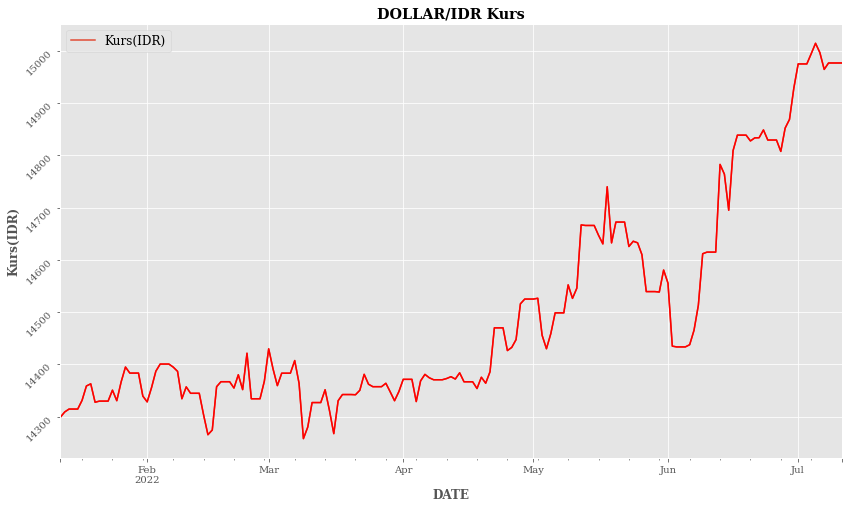

In [13]:
ax = df.plot(figsize=(14, 8))
ax.plot(df.index.values,
        df['Kurs(IDR)'],
       color='red')

plt.xlabel("DATE", fontweight='bold')                           
plt.ylabel("Kurs(IDR)", fontweight='bold')                          
plt.title("DOLLAR/IDR Kurs", fontweight='bold')
plt.yticks(rotation=45)
plt.legend(fontsize=12)
plt.show()

Based on the conclusion above, we can see that Dollar-IDR rate has been stable in the first 4 months and Dollar rate finally see rapid hikes from the first quarter of June until now.